In [0]:
from IPython.display import clear_output
clear_output()

In [0]:
!wget https://raw.githubusercontent.com/daniarnaizg/TFG-Amazon-Scraper/master/outputs/first500/first500final.json

--2019-05-29 12:22:30--  https://raw.githubusercontent.com/daniarnaizg/TFG-Amazon-Scraper/master/outputs/first500/first500final.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74720 (73K) [text/plain]
Saving to: ‘first500final.json’

first500final.json  100%[===================>]  72.97K  --.-KB/s    in 0.01s   

2019-05-29 12:22:30 (5.02 MB/s) - ‘first500final.json’ saved [74720/74720]



In [0]:
!mkdir dataset
!mkdir dataset/0
!mkdir dataset/1

In [0]:
import json, requests
from PIL import Image
from io import BytesIO

"""
Function that downloads every image of the json file to a folder named after its class. Each image's name contains
the class it corresponds to.

0 -> Modelo
1 -> Sin Modelo

"""

def requestImg(image_name, url):
    r = requests.get(url)
    i = Image.open(BytesIO(r.content))
    
    if image_name[0] is 'M':
        i.save("dataset/0/" + image_name)
    else:
        i.save("dataset/1/" + image_name)
    
def downloadImgs():
    with open('first500final.json', 'r') as f:
        data = json.load(f)
        
    for i in range(len(data)):
        url = data[str(i)]['URL']
        label = str(data[str(i)]['LABEL'])
        image_name = label + '_' + str(i) + '.jpg'
        requestImg(image_name, url)

In [0]:
downloadImgs()

In [0]:
!ls dataset/0

Modelo_103.jpg	Modelo_179.jpg	Modelo_259.jpg	Modelo_358.jpg	Modelo_462.jpg
Modelo_104.jpg	Modelo_183.jpg	Modelo_260.jpg	Modelo_35.jpg	Modelo_464.jpg
Modelo_106.jpg	Modelo_184.jpg	Modelo_266.jpg	Modelo_361.jpg	Modelo_467.jpg
Modelo_110.jpg	Modelo_185.jpg	Modelo_26.jpg	Modelo_362.jpg	Modelo_470.jpg
Modelo_112.jpg	Modelo_186.jpg	Modelo_277.jpg	Modelo_371.jpg	Modelo_47.jpg
Modelo_113.jpg	Modelo_188.jpg	Modelo_27.jpg	Modelo_372.jpg	Modelo_480.jpg
Modelo_114.jpg	Modelo_193.jpg	Modelo_281.jpg	Modelo_377.jpg	Modelo_487.jpg
Modelo_119.jpg	Modelo_198.jpg	Modelo_284.jpg	Modelo_394.jpg	Modelo_55.jpg
Modelo_120.jpg	Modelo_19.jpg	Modelo_285.jpg	Modelo_398.jpg	Modelo_56.jpg
Modelo_121.jpg	Modelo_200.jpg	Modelo_290.jpg	Modelo_39.jpg	Modelo_58.jpg
Modelo_122.jpg	Modelo_204.jpg	Modelo_301.jpg	Modelo_402.jpg	Modelo_60.jpg
Modelo_128.jpg	Modelo_206.jpg	Modelo_302.jpg	Modelo_404.jpg	Modelo_62.jpg
Modelo_12.jpg	Modelo_210.jpg	Modelo_304.jpg	Modelo_408.jpg	Modelo_66.jpg
Modelo_131.jpg	Modelo_213.jpg	Modelo_3

---
> > KERAS
---

In [0]:
import matplotlib.pyplot as plt

import numpy as np
import glob
import cv2
import os

from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D
from keras.layers import Flatten, Lambda, BatchNormalization
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
'''Config of the model'''

EPOCHS = 10     # Number of training epochs
INIT_LR = 1e-3  # Initial Learning rate
BS = 32         # Batch size

data = []
labels = []

In [0]:
'''
Extraction of the data and label of every image.
'''
for folder in os.listdir('dataset/'):
  dir = 'dataset/' + folder + '/*.jpg'
  class_dir = glob.glob(dir)
  for imagePath in class_dir:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (28, 28))
    image = img_to_array(image)
    data.append(image)
    labels.append(folder) # The label is the  folder each image is in

In [0]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [0]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [0]:
trainX.shape

(367, 28, 28, 3)

In [0]:
trainY.shape

(367,)

In [0]:
# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

In [0]:
trainY.shape

(367, 2)

In [0]:
'''Initialization of the model'''
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

optimizer = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# DESCARGAMOS DESDE EL REPOSITORIO EL MODELO YA ENTRENADO
!wget https://github.com/daniarnaizg/TFG-Amazon-Scraper/raw/master/keras_models/test_amazon.h5

In [0]:
model_path = 'test_amazon.h5'

In [0]:
# Load the model so it isn´t necessary to train it everytime
model.load_weights(model_path)

In [0]:
'''Train the network'''
model.fit(trainX, trainY, batch_size=BS, validation_data=(testX, testY), epochs=EPOCHS, verbose=1)
model.save(model_path)

score = model.evaluate(testX, testY, verbose=1)


print('Test loss: ' + str(score[0]))
print('Test accuracy: ' + str(score[1]))

Instructions for updating:
Use tf.cast instead.
Train on 367 samples, validate on 123 samples
Epoch 1/10
367/367 [==============================] - 2s 5ms/step - loss: 0.7715 - acc: 0.6757 - val_loss: 0.4325 - val_acc: 0.7967
Epoch 2/10
367/367 [==============================] - 1s 2ms/step - loss: 0.3430 - acc: 0.8501 - val_loss: 0.3695 - val_acc: 0.8537
Epoch 3/10
367/367 [==============================] - 1s 3ms/step - loss: 0.2144 - acc: 0.9237 - val_loss: 0.3547 - val_acc: 0.8455
Epoch 4/10
367/367 [==============================] - 1s 3ms/step - loss: 0.1868 - acc: 0.9373 - val_loss: 0.3012 - val_acc: 0.8780
Epoch 5/10
367/367 [==============================] - 1s 3ms/step - loss: 0.1376 - acc: 0.9401 - val_loss: 0.2667 - val_acc: 0.9106
Epoch 6/10
367/367 [==============================] - 1s 3ms/step - loss: 0.1046 - acc: 0.9673 - val_loss: 0.4296 - val_acc: 0.8455
Epoch 7/10
367/367 [==============================] - 1s 3ms/step - loss: 0.1128 - acc: 0.9673 - val_loss: 0.2490 

In [0]:
!ls

dataset  first500final.json  sample_data  test_amazon.h5


In [0]:
# from google.colab import files
# files.download('test_amazon.h5')

---
> OPENCV - FACE DETECTION
---


In [0]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [0]:
# HAAR CASCADE file from OpenCV repo
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2019-05-29 12:27:36--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.04s   

2019-05-29 12:27:36 (20.9 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [0]:
cascPath = "haarcascade_frontalface_default.xml"
# cascPath = "haarcascade_smile.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

In [0]:
def faceDetector(image, faceCascade):
    
    # image = cv2.imread("dataset/Modelo_425.jpg")
    # cv2_imshow(image)
    image = cv2.resize(image, (500, 500))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=50,
        minSize=(30, 30),
        flags = cv2.CASCADE_SCALE_IMAGE
    )

    if len(faces) > 0:
#         print("Predicción: Modelo con cara")
        return 'Modelo con cara'
    else:
#         print("Predicción: Modelo sin cara")
        return 'Modelo sin cara'
    
    # print("Found {0} faces!".format(len(faces)))

---
> EVALUACION
---



In [0]:
def evaluate(image_dir):

    # load the image
    image = cv2.imread(image_dir)
    original = image.copy()

    # pre-process the image for classification
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    
    predictions = model.predict(image)[0]
    prediction = int(predictions.argmax())
    
    final_prediction = ''
    
    if prediction is not 0:
        final_prediction = "Sin modelo"
    else:
        final_prediction = faceDetector(original, faceCascade)
        
#     print("Predicción: ", final_prediction)
#     cv2_imshow(original)
    
    return final_prediction
        
    

---
>> PRUEBA DE CATEGORIZAR EN MASA
---

In [0]:
# ARCHIVO JSON DE LOS PRODUCTOS CUYA IMAGENES QUEREMOS CATEGORIZAR
!wget https://raw.githubusercontent.com/daniarnaizg/TFG-Amazon-Scraper/master/outputs/test_women_products.json

--2019-05-29 12:27:51--  https://raw.githubusercontent.com/daniarnaizg/TFG-Amazon-Scraper/master/outputs/test_women_products.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69860 (68K) [text/plain]
Saving to: ‘test_women_products.json’

test_women_products 100%[===================>]  68.22K  --.-KB/s    in 0.01s   

2019-05-29 12:27:51 (4.65 MB/s) - ‘test_women_products.json’ saved [69860/69860]



In [0]:
!mkdir image_folder

In [0]:
# Recorrer el json y por cada asin descargar la primera url y asociarla a su asin (nombre de la imagen descargada).

def requestImg(image_name, url):
    r = requests.get(url)
    img = Image.open(BytesIO(r.content))
    img.save("image_folder/" + image_name)
    
def downloadImage():
    with open('test_women_products.json', 'r') as f:
        data = json.load(f)
        
    for i in range(len(data)):
        url = data[i]['image_urls'][0]
        asin = data[i]['asin']
        image_name = asin + '.jpg'
        requestImg(image_name, url)
        
    f.close()

In [0]:
downloadImage()

In [0]:
!ls image_folder/

B0000ANHT7.jpg	B017STTRC2.jpg	B073TXF9SX.jpg	B07BKV4RK5.jpg	B07HG29T4T.jpg
B001IVWE86.jpg	B01BDZMLZW.jpg	B0746PRDQN.jpg	B07BN7LTZL.jpg	B07HL29S76.jpg
B00ARCZ1XW.jpg	B01EU5CY6S.jpg	B075LYZ1W2.jpg	B07BQPWZ47.jpg	B07J427585.jpg
B00B6E7GL0.jpg	B01HR6DPOW.jpg	B075ZZF47B.jpg	B07BSPVZZF.jpg	B07JDZPLBD.jpg
B00BJMBSBS.jpg	B01JJQS8EU.jpg	B07742V2G8.jpg	B07CZQD95F.jpg	B07JFZSFSK.jpg
B00CEH37WU.jpg	B01JU8UM4G.jpg	B07756L54F.jpg	B07D7R6NST.jpg	B07K2R6S2X.jpg
B00G570JOE.jpg	B01LXUFWME.jpg	B0775Q16HL.jpg	B07DJ3K93D.jpg	B07KCDGSMX.jpg
B00I2U85JI.jpg	B01MR5XT4A.jpg	B07763F6Z8.jpg	B07DM6XJ26.jpg	B07L491FN7.jpg
B00JULYF0Q.jpg	B01N0X9XSF.jpg	B0779XSN61.jpg	B07DQ9DJ8Z.jpg	B07M61KLM6.jpg
B00JUM8WEU.jpg	B06XWL2ZX8.jpg	B077ZMKWVM.jpg	B07DYCJ7MC.jpg	B07MK1F1NX.jpg
B00KBZPZHC.jpg	B06XWQBJ6N.jpg	B077ZN2F83.jpg	B07F2JFXC3.jpg	B07MXX41K9.jpg
B00KBZQ1T8.jpg	B071DC1CT5.jpg	B078LG1T3H.jpg	B07F2ZCQHJ.jpg	B07MZVYSCR.jpg
B00KQFK8FQ.jpg	B071JPX48H.jpg	B078SHT9G1.jpg	B07F9DR4XJ.jpg	B07NVJKGVR.jpg
B00KV9IY6M.jpg	B071P3PQZ8

Modelo con cara


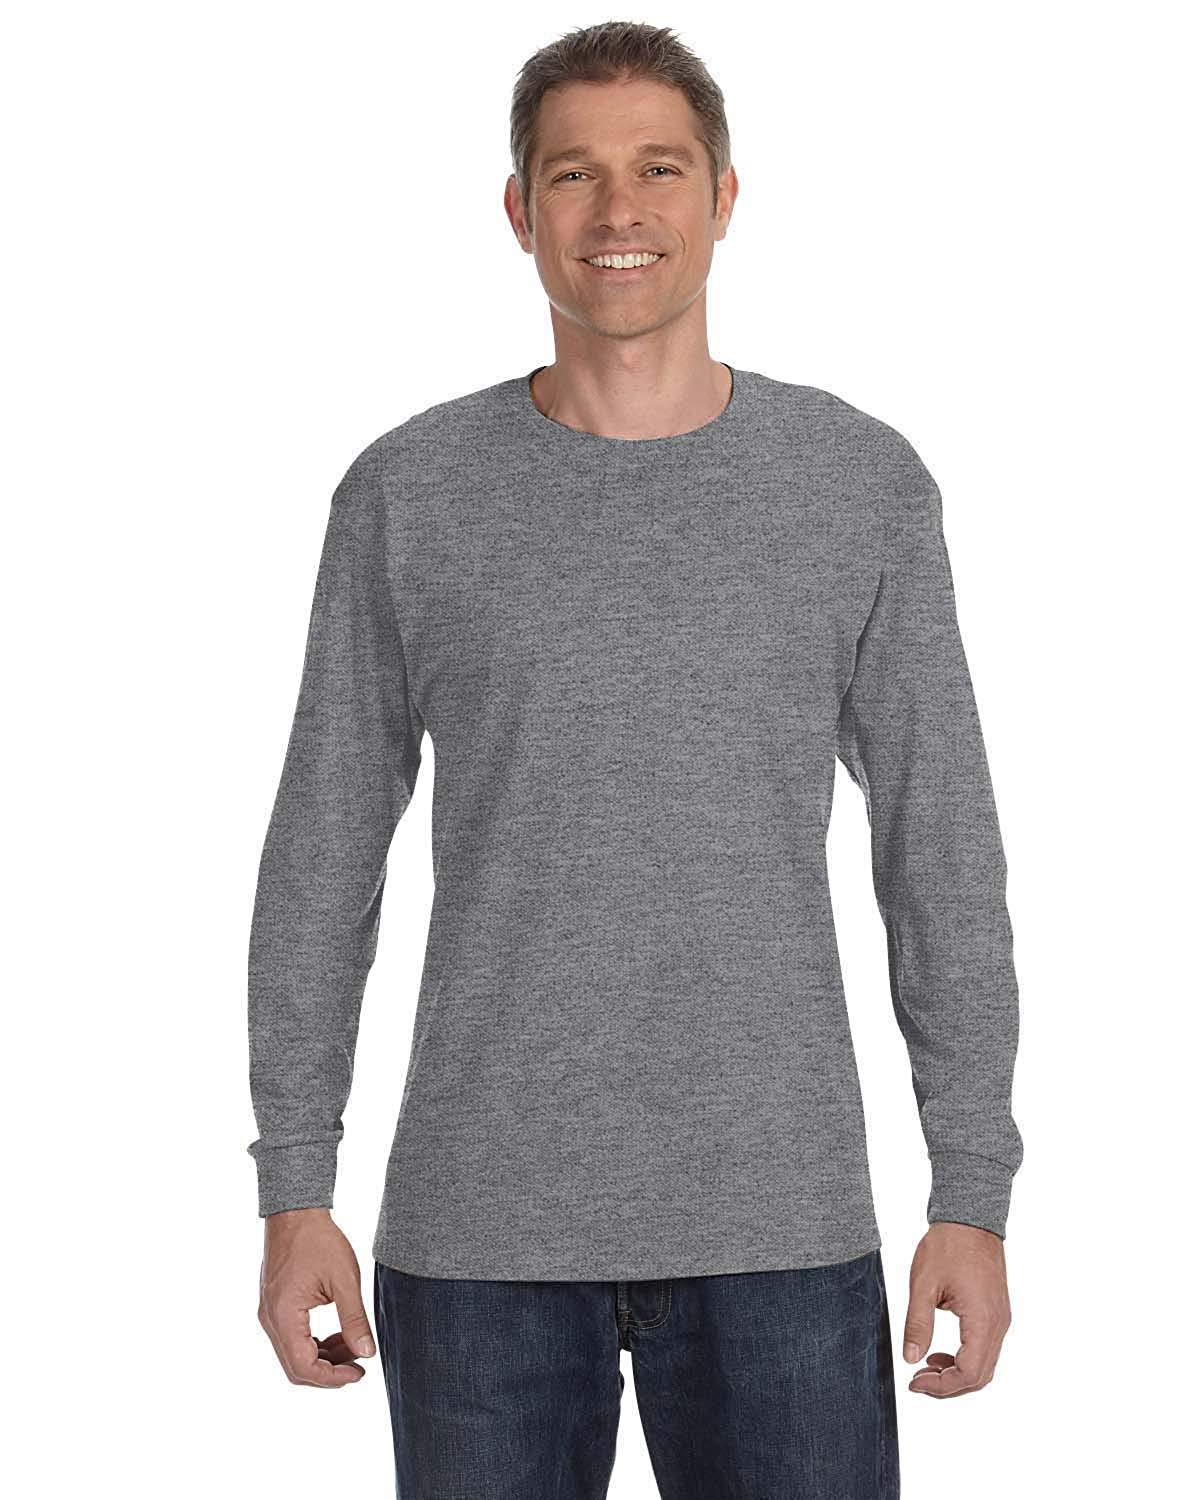

In [0]:
# PRUEBA MANUAL
image = 'image_folder/B00BJMBSBS.jpg'
pred = evaluate(image)
print(pred)
cv2_imshow(cv2.imread(image))

In [0]:
!wget https://github.com/daniarnaizg/TFG-Amazon-Scraper/raw/master/databases/test.db

--2019-05-29 12:29:19--  https://github.com/daniarnaizg/TFG-Amazon-Scraper/raw/master/databases/test.db
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniarnaizg/TFG-Amazon-Scraper/master/databases/test.db [following]
--2019-05-29 12:29:20--  https://raw.githubusercontent.com/daniarnaizg/TFG-Amazon-Scraper/master/databases/test.db
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 589824 (576K) [application/octet-stream]
Saving to: ‘test.db’

test.db             100%[===================>] 576.00K  --.-KB/s    in 0.04s   

2019-05-29 12:29:20 (15.6 MB/s) - ‘test.db’ saved [589824/589824]



In [0]:
!ls

dataset				     image_folder    test.db
first500final.json		     sample_data     test_women_products.json
haarcascade_frontalface_default.xml  test_amazon.h5


In [0]:
# ¿¿¿¿¿¿¿¿¿¿¿¿¿¿¿¿¿¿¿¿¿¿¿ES MEJOR AÑADIR EL CAMPO PREDICCION A UNA TABLA YA EXISTENTE???????????????????????

import sqlite3

def setupDBConn():
    conn = sqlite3.connect('test.db')
    curr = conn.cursor()

In [0]:
def createTables(curr):
        # self.dropAmazonTables()
        curr.execute("""CREATE TABLE IF NOT EXISTS PREDICTIONS(
                        asin TEXT FOREING KEY NOT NULL,
                        prediction TEXT
                        )""")

In [0]:
def storePredictionInDb(curr, conn, item):
    curr.execute("""INSERT INTO PREDICTIONS VALUES( ?, ?)""",(
        item['asin'],
        item['prediction']
        ))
    conn.commit()

In [0]:
# Recorrrer todas las imagenes descargadas y categorizar cada una de ellas con el modelo entrenado anteriormente.
# Guardar el resultado en un nuevo archivo json con los valores ASIN y PREDICCIÓN

######## REALMENTE LO QUIERO EN JSON?????? ###########################!!!!!!!!!!!!!!!!!!!!!!!!!!

import json
def savePredictions(curr, conn):
    data = []
    for imagePath in glob.glob('image_folder/*.jpg'):
        item = {}
        item['asin'] = imagePath[13:23]
        item['prediction'] = evaluate(imagePath)
        
        storePredictionInDb(curr, conn, item)
        
        data.append(item)

    with open('output.json', 'w') as output:
        json.dump(data, output)

In [0]:
def closeDB(conn):
    conn.close()

In [0]:
# setupDBConn()
conn = sqlite3.connect('test.db')
curr = conn.cursor()

In [0]:
createTables(curr)

In [0]:
savePredictions(curr, conn)

In [0]:
closeDB(conn)

In [0]:
from google.colab import files
files.download('output.json')
files.download('test.db')

---
>>>PRUEBA SQL --> EXCEL (CON PANDAS)
---

In [0]:
import pandas as pd
import sqlite3

In [0]:
conn = sqlite3.connect('test.db')

In [0]:
main_df = pd.read_sql_query("SELECT * FROM MAIN_AMAZON", conn)
images_df = pd.read_sql_query("SELECT * FROM IMAGE_URLS", conn)
comments_df = pd.read_sql_query("SELECT * FROM COMMENTS", conn)
predictions_df = pd.read_sql_query("SELECT * FROM PREDICTIONS", conn)

In [0]:
main_df.head()

,asin,sex,rating,description,reviews,brand,price_range
0,B0775Q16HL,man,4.0,An Amazon Brand - These classic tees feature a...,194,Amazon-Essentials,$10.20 - $12.00
1,B077ZMKWVM,man,4.3,Gildan is one of the world's largest verticall...,1777,Gildan,$9.99 - $69.90
2,B07BBG8KPS,man,4.1,Fruit of the Loom men's crews work great alone...,6019,Fruit-of-the-Loom,$14.79 - $62.99
3,B07JFZSFSK,man,3.7,The Hanes men's ComfortSoft t-shirt is a perfe...,1054,Hanes,$19.23 - $50.20
4,B017STTRC2,man,4.2,"Gildan Heavy Weight T-shirts, 10 pack. 100% pr...",1162,Gildan,$25.43 - $92.69


In [0]:
images_df.head()

,asin,url
0,B0775Q16HL,https://images-na.ssl-images-amazon.com/images...
1,B077ZMKWVM,https://images-na.ssl-images-amazon.com/images...
2,B077ZMKWVM,https://images-na.ssl-images-amazon.com/images...
3,B07BBG8KPS,https://images-na.ssl-images-amazon.com/images...
4,B07JFZSFSK,https://images-na.ssl-images-amazon.com/images...


In [0]:
comments_df.head()

,asin,comment
0,B0775Q16HL,I ordered a two-pack of these Slim Fit t-shirt...
1,B0775Q16HL,I bought both medium and large to check for be...
2,B0775Q16HL,One of the shirts was just as expected; the ot...
3,B0775Q16HL,The material of the shirts feel really good bu...
4,B0775Q16HL,Not sure why these were called slim fit. This ...


In [0]:
predictions_df.head()

,asin,prediction
0,B07F2ZCQHJ,Modelo sin cara
1,B06XWL2ZX8,Sin modelo
2,B073TXF9SX,Modelo sin cara
3,B00JUM8WEU,Sin modelo
4,B07DQ9DJ8Z,Modelo con cara


---
>>> EXPORTAR A EXCEL

In [0]:
!pip install XlsxWriter

     |████████████████████████████████| 143kB 5.0MB/s 


In [0]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('test_multiple_pages.xlsx', engine='xlsxwriter')

In [0]:
# Write each dataframe to a different worksheet.
main_df.to_excel(writer, sheet_name='Productos')
images_df.to_excel(writer, sheet_name='Imagenes')
comments_df.to_excel(writer, sheet_name='Comentarios')
predictions_df.to_excel(writer, sheet_name='Predicciones')

In [0]:
# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [0]:
from google.colab import files
files.download('test_multiple_pages.xlsx')